Skipping row 252 due to inconsistent column count in input.csv or labels.csv. Input columns: 19738, Expected: 30000. Label columns: 1, Expected: 1.
Skipping row 265 due to data conversion error in input_test.csv or labels_test.csv: could not convert string to float: ''
shape of X_train: (251, 100, 100, 3)
shape of Y_train: (251, 1)
shape of X_test: (264, 100, 100, 3)
shape of Y_test: (264, 1)


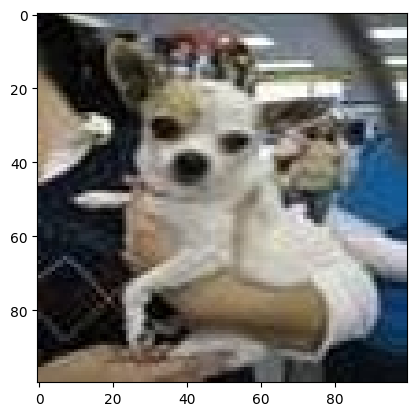

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 759ms/step - accuracy: 0.8704 - loss: 0.2261 - val_accuracy: 0.7576 - val_loss: 6.2357
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 904ms/step - accuracy: 1.0000 - loss: 6.1876e-13 - val_accuracy: 0.7576 - val_loss: 11.2182
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 691ms/step - accuracy: 1.0000 - loss: 5.7479e-21 - val_accuracy: 0.7576 - val_loss: 14.2300
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 943ms/step - accuracy: 1.0000 - loss: 2.3045e-14 - val_accuracy: 0.7576 - val_loss: 15.8400
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 716ms/step - accuracy: 1.0000 - loss: 9.5477e-21 - val_accuracy: 0.7576 - val_loss: 16.6487
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 928ms/step - accuracy: 1.0000 - loss: 5.7589e-19 - val_accuracy: 0.7576 - val_loss: 17.0398
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 694ms/step - accuracy: 1.0000 - loss: 1.3709e-23 - val_accuracy: 0.7576 - val_loss: 17.2244
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 1.0000 - loss: 2.3050e-26 - v

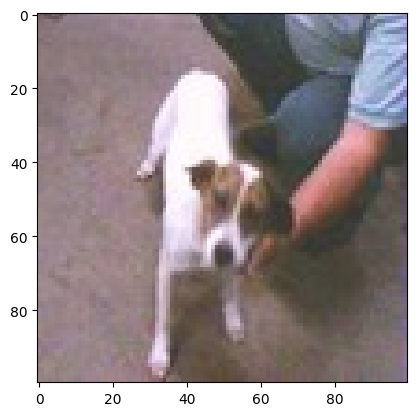

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
The model prediction is dog
our model is saved


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense , Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import csv # Import csv module for robust CSV parsing

# Helper function to load data and handle inconsistent rows
def load_and_filter_data(input_file, label_file, expected_input_cols):
    X_data = []
    Y_data = []

    with open(input_file, 'r') as f_input, open(label_file, 'r') as f_label:
        input_reader = csv.reader(f_input)
        label_reader = csv.reader(f_label)

        for i, (input_row, label_row) in enumerate(zip(input_reader, label_reader)):
            try:
                processed_input_row = [float(val) for val in input_row]
                processed_label_row = [float(val) for val in label_row]

                if len(processed_input_row) == expected_input_cols and len(processed_label_row) == 1:
                    X_data.append(processed_input_row)
                    Y_data.append(processed_label_row[0]) # Labels are single values
                else:
                    print(f"Skipping row {i+1} due to inconsistent column count in {input_file} or {label_file}. "
                          f"Input columns: {len(processed_input_row)}, Expected: {expected_input_cols}. "
                          f"Label columns: {len(processed_label_row)}, Expected: 1.")
            except ValueError as e:
                print(f"Skipping row {i+1} due to data conversion error in {input_file} or {label_file}: {e}")
            except IndexError:
                print(f"Skipping row {i+1} due to missing label row in {label_file}.")

    return np.array(X_data), np.array(Y_data)

# Define expected column count for input images (100x100 pixels with 3 color channels)
expected_image_cols = 100 * 100 * 3

X_train, Y_train = load_and_filter_data('input.csv', 'labels.csv', expected_image_cols)
X_test, Y_test = load_and_filter_data('input_test.csv', 'labels_test.csv', expected_image_cols)

X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train / 255.0
X_test = X_test / 255.0

#data augmentation to improve training
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)


print("shape of X_train:", X_train.shape)
print("shape of Y_train:", Y_train.shape)
print("shape of X_test:", X_test.shape)
print("shape of Y_test:", Y_test.shape)

idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

model = Sequential()

model.add(Conv2D(32, (3,3), activation= 'relu', input_shape = (100,100,3))) # 32,64 is the filter
model.add(MaxPooling2D((2,2)))# converting 2d data to 1d data
model.add(Dropout(0.25)) # to remove particular data from the dataset

model.add(Conv2D(64, (3,3), activation= 'relu'))#(3,3) is the size of the filter( hidden layers)
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(datagen.flow(X_train, Y_train, batch_size=32),
          epochs=30,
          validation_data=(X_test, Y_test),
          verbose=1)

model.evaluate(X_test, Y_test)

idx2= random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = "dog"

else:
    pred = 'cat'

print("The model prediction is", pred)

model.save('model.keras')
print('our model is saved')
